# Kaggle Challenge : Digit Recognizer

In [23]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as random
from sklearn.tree import DecisionTreeClassifier

### Read, randomize & split data

In [24]:
#Read the data
fullDataSet = pd.read_csv("train.csv")
fullDataSetMatrix = fullDataSet.as_matrix()
#Randomize the data
random.shuffle(fullDataSetMatrix)
#Split the data
precentTrainData = 10 #Change this value for more or less train data
howManyTrain = int((len(fullDataSetMatrix)/100)*precentTrainData)
#Make train Data Set
trainDataSet = fullDataSetMatrix[0:howManyTrain, 1:]
trainlabels = fullDataSetMatrix[0:howManyTrain, 0]
#Make test Data Set
testDataSet = fullDataSetMatrix[howManyTrain:, 1:]
testlabels = fullDataSetMatrix[howManyTrain:, 0]

c:\users\miked\pycharmprojects\werkstukai\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Train a model with DecisionTree

In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(trainDataSet,trainlabels)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Show a random number from data, just for fun 

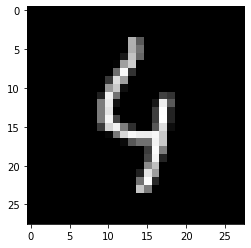

Value of image is : 4
Predicted value with DecisionTreeClassifier : [4]


In [26]:
randomNumData = testDataSet[0]
randomNumData.shape=(28,28)
plt.imshow(randomNumData, cmap='gray')
plt.show()
print("Value of image is : " + str(testlabels[0]))
#print(dtc.predict( [trainDataSet[randomNum]] ))
print("Predicted value with DecisionTreeClassifier :" , dtc.predict( [testDataSet[0]] ))